# Predicting insurance prices

# Outline
- [&nbsp;&nbsp;1 Exploring Data and Setting Up](#insurance_1)
- [&nbsp;&nbsp;2 Visualizing Data](#insurance_2)
- [&nbsp;&nbsp;3 Using First Principles](#insurance_3)
- [&nbsp;&nbsp;4 Scikit Learn](#insurance_4)

<a name="insurance_1"></a>
## 1 Exploring Data and Setting Up


First load data, replace categorical values and check correlations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import copy
import math

training_set = pd.read_csv("/data/insurance.csv")

le = LabelEncoder()
smoker_column = le.fit_transform(training_set['smoker'])
region_column = le.fit_transform(training_set['region'])
sex_column = le.fit_transform(training_set['sex'])
training_set.drop("sex", axis=1, inplace=True)
training_set["sex"] = sex_column
training_set.drop("smoker", axis=1, inplace=True)
training_set["smoker"] = smoker_column
training_set.drop("region", axis=1, inplace=True)
training_set["region"] = region_column

# Check correlation
# a coefficient above 0.75 (or below -0.75) is considered a high degree of correlation
# while one between -0.3 and 0.3 is a sign of weak or no correlation.
print('Correlation Smoker: ')
print(training_set['smoker'].corr(training_set['charges']))
print('Correlation Region: ')
print(training_set['region'].corr(training_set['charges']))
print('Correlation Sex: ')
print(training_set['sex'].corr(training_set['charges']))
print('Correlation Age: ')
print(training_set['age'].corr(training_set['charges']))
print('Correlation Children: ')
print(training_set['children'].corr(training_set['charges']))
print('Correlation BMI: ')
print(training_set['bmi'].corr(training_set['charges']))


Correlation Smoker: 
0.7872514304984782
Correlation Region: 
-0.006208234909444499
Correlation Sex: 
0.05729206220202532
Correlation Age: 
0.2990081933306476
Correlation Children: 
0.06799822684790469
Correlation BMI: 
0.19834096883362878


In [2]:
# Convert df to numpy array
# Split input and output
x_np_array = training_set[['smoker','region']].to_numpy()[:1200]

# print(np.c_[x_np_array, x_np_array/2])

y_np_array = training_set['charges'].to_numpy()[:1200]

x_np_array_test = training_set[['smoker','region']].to_numpy()[1200:]
y_np_array_test = training_set['charges'].to_numpy()[1200:]

# initialize parameters
w = np.array([0.1, 0.1])
b = 0

# make sure the weight parameter is same size as the input matrix
assert (w.shape[0] == x_np_array.shape[1])

print(x_np_array)
print(y_np_array)

[[1 3]
 [0 2]
 [0 2]
 ...
 [0 2]
 [0 1]
 [0 3]]
[16884.924    1725.5523   4449.462   ...  5699.8375   6393.60345
  4934.705  ]


In [3]:
def zscore_normalize_features(np_array):
    """
        computes  np_array, zcore normalized by column

        Args:
          np_array (ndarray (m,n))     : input data, m examples, n features

        Returns:
          X_norm (ndarray (m,n)): input normalized by column
          mu (ndarray (n,))     : mean of each feature
          sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu = np.mean(np_array, axis=0)  # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(np_array, axis=0)  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    np_array_norm = (np_array - mu) / sigma

    return np_array_norm, mu, sigma

# Scale the features
#age_norm, age_np_array_mu, age_np_array_sigma = zscore_normalize_features(x_np_array[:,1])
#print(np.c_[x_np_array[:,0], age_norm])
x_np_array_norm, x_np_array_mu, x_np_array_sigma = zscore_normalize_features(x_np_array)
#x_np_array_norm = np.c_[x_np_array[:,0], age_norm]
# print(x_np_array)
# print(x_np_array_norm)
# print(x_np_array_mu)
# print(x_np_array_sigma)

<a name="insurance_2"></a>
## 2 Visualizing Data

Only using features where the correlation warrants us using it in the model

**Ages vs Charge**

In [4]:
# Visualize age vs charges

# plt.scatter(x_np_array_norm[:,0], y_np_array, marker='x', c='r', label="Actual Value"); 
# plt.title("age vs charges")
# plt.xlabel("Age"); plt.ylabel("CHarges"); plt.legend(); plt.show()

# plt.show()

**Smoker vs Charges**

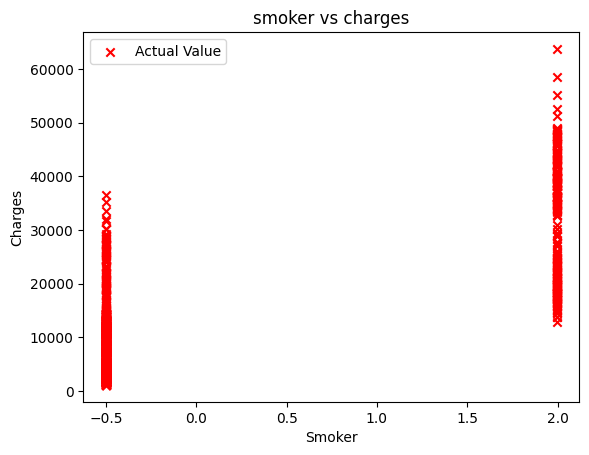

In [5]:
plt.scatter(x_np_array_norm[:,0], y_np_array, marker='x', c='r', label="Actual Value"); 
plt.title("smoker vs charges")
plt.xlabel("Smoker"); plt.ylabel("Charges"); plt.legend(); plt.show()

plt.show()

**Age vs Charges**

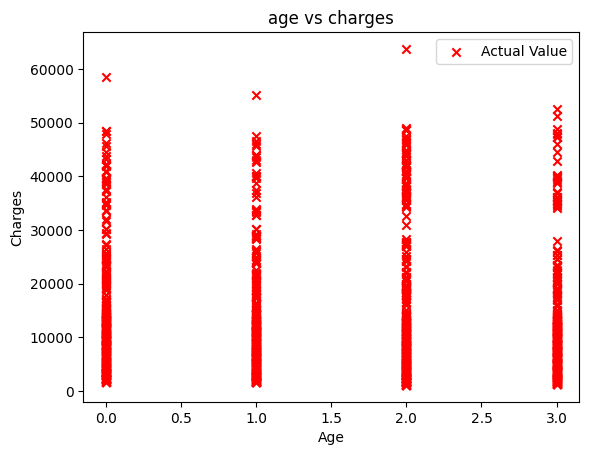

In [6]:
plt.scatter(x_np_array[:,1], y_np_array, marker='x', c='r', label="Actual Value"); 
plt.title("age vs charges")
plt.xlabel("Age"); plt.ylabel("Charges"); plt.legend(); plt.show()

plt.show()

**Plot of age and smoker vs charges**

'smoker','age','bmi','region','children'
smoker, age 
smoker, bmi
smoker, region
smoker, children 
age,bmi
age,region
age, children
bmi, region
bmi, children
region, children

[[ 1.99480653  1.34864938]
 [-0.50130175  0.44199434]
 [-0.50130175  0.44199434]
 ...
 [-0.50130175  0.44199434]
 [-0.50130175 -0.46466071]
 [-0.50130175  1.34864938]]


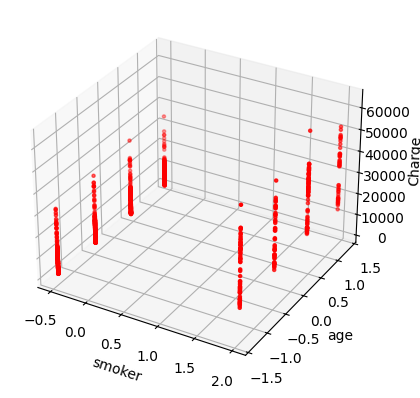

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(x_np_array_norm)
ax.scatter(x_np_array_norm[:,0], x_np_array_norm[:,1], y_np_array, marker='.', color='red')
ax.set_xlabel("smoker")
ax.set_ylabel("age")
ax.set_zlabel("Charge")

plt.show()

**Plot of bmi and age vs charges**

In [8]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_np_array[:,0], x_np_array[:,2], y_np_array, marker='.', color='red')
# ax.set_xlabel("Age")
# ax.set_ylabel("BMI")
# ax.set_zlabel("Charge")

# plt.show()

**Plot of bmi and smoker vs charges**

In [9]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_np_array[:,0], x_np_array[:,1], y_np_array, marker='.', color='red')
# ax.set_xlabel("Smoker")
# ax.set_ylabel("BMI")
# ax.set_zlabel("Charge")

# plt.show()

<a name="insurance_3"></a>
## 3 Using First Principles

Final Equation: y = 13249.40 + 9438.96x1 + -162.97x2
MAE: 8014.214084321883
RMSE: 10378.529555408277
[ 6198.7518   8733.22925  2055.3249   9964.06    18223.4512   5116.5004
 36910.60803 38415.474   20296.86345 12347.172    5373.36425 23563.01618
  1702.4553  10806.839    3956.07145 12890.05765  5415.6612   4058.1161
 41661.602    7537.1639   4718.20355  6593.5083   8442.667   26125.67477
  6858.4796   4795.6568   6640.54485  7162.0122  10594.2257  11938.25595
 60021.39897 20167.33603 12479.70895 11345.519    8515.7587   2699.56835
 14449.8544  12224.35085  6985.50695  3238.4357  47269.854   49577.6624
  4296.2712   3171.6149   1135.9407   5615.369    9101.798    6059.173
  1633.9618  37607.5277  18648.4217   1241.565   16232.847   15828.82173
  4415.1588   6474.013   11436.73815 11305.93455 30063.58055 10197.7722
  4544.2348   3277.161    6770.1925   7337.748   10370.91255 26926.5144
 10704.47    34254.05335  1880.487    8615.3      3292.52985  3021.80915
 14478.33015  4747.0529  17043

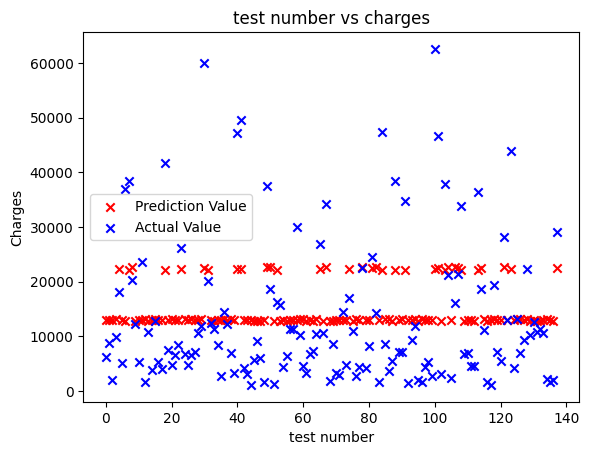

In [10]:
def predict_function(x, w, b):
    """
        single predict using linear regression
        Args:
          x (ndarray): Shape (n,) example with multiple features, one set of training features
          w (ndarray): Shape (n,) model parameters
          b (scalar):             model parameter

        Returns:
          p (scalar):  prediction
    """
    return np.dot(x, w) + b


def compute_cost(x, y, w, b):
    """
        x (ndarray (m,n) m = number of training examples, n = number of features)
        y (ndarray (m,) target values
        w (ndarray (n,)) : initial model parameters
        b (scalar)       : initial model parameter
    """
    m, n = x.shape
    cost = 0.0

    # iterate over all training examples
    for i in range(m):
        cost = cost + ((predict_function(x, w, b) - y) ** 2)

    return ((1/2)*m) * cost


def compute_gradient(x, y, w, b):
    """
        Computes the gradient for linear regression
        dj_dw = (sum_1_m(f(x) - y) x[i])
        dj_db = (sum_1_m(f(x) - y))
        Args:
          x (ndarray (m,n)): Data, m examples with n features
          y (ndarray (m,)) : target values
          w (ndarray (n,)) : model parameters
          b (scalar)       : model parameter

        Returns:
          dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
          dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m, n = x.shape  # (number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    # iterate over all training examples
    for i in range(m):
        err = predict_function(x[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]  # gradient at each training point
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
        cost_function = (1/2m)sum(predict(x, w, b) - y)^2 m = number of training examples

        gradient_function = (1/m)sum(predict(x, w, b) - y)x[i] i = ith training input
            err = (1/m)sum(predict(x, w, b) - y)
            w[i] = w[i] - a * (err * x[i])
            b = b - a * err

        Performs batch gradient descent to learn theta. Updates theta by taking
        num_iters gradient steps with learning rate alpha

        Args:
          x (ndarray (m,n))   : Data, m examples with n features
          y (ndarray (m,))    : target values
          w_in (ndarray (n,)) : initial model parameters
          b_in (scalar)       : initial model parameter
          cost_function       : function to compute cost
          gradient_function   : function to compute the gradient
          alpha (float)       : Learning rate
          num_iters (int)     : number of iterations to run gradient descent

        Returns:
          w (ndarray (n,)) : Updated values of parameters
          b (scalar)       : Updated value of parameter
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw  ##None
        b = b - alpha * dj_db  ##None

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        # if i % math.ceil(num_iters / 10) == 0:
        #     print(f"Iteration {i:4d}: Cost {J_history[-1]:0.2f}  ")

    return w, b, J_history  # return final w,b and J history for graphing



# Run linear regression
w_final, b_final, cost_history = gradient_descent(x_np_array_norm, y_np_array, w, b, compute_cost, compute_gradient, alpha=0.1, num_iters=500)

# Predict Model
print("Final Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(b_final, w_final[0], w_final[1]))

# Get predictions for test set and compare them to actual targets
y_pred = np.zeros((len(y_np_array_test),))
for i in range(len(y_np_array_test)):
    y_pred[i] = predict_function(x_np_array_test[i], w_final, b_final)

print("MAE: {}".format(np.abs(y_np_array_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_np_array_test-y_pred)**2).mean())))

print(y_np_array_test)

iteration = [i for i in range(len(y_pred))]
np_iteration = np.array(iteration)
plt.scatter(iteration, y_pred, marker='x', c='r', label="Prediction Value"); 
plt.scatter(iteration, y_np_array_test, marker='x', c='b', label="Actual Value"); 
plt.title("test number vs charges")
plt.xlabel("test number"); plt.ylabel("Charges"); plt.legend(); plt.show()

plt.show()


<a name="insurance_4"></a>
## 4 Scikit Learn

In [12]:
# Linear regression model
model = LinearRegression()
model.fit(x_np_array_norm, y_np_array)
y_pred = model.predict(x_np_array_test)

print("MAE: {}".format(np.abs(y_np_array_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_np_array_test-y_pred)**2).mean())))
# Model parameters
coefs = model.coef_
intercept = model.intercept_
# Predict Model
print("Final Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0], coefs[1]))

MAE: 8014.214084321886
RMSE: 10378.529555408284
Final Equation: y = 13249.40 + 9438.96x1 + -162.97x2
